In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Read Input Data
Read input_train.csv file and preprocess data by scaling each feature to the same range (0~1)

In [2]:
data = pd.read_csv("input_train.csv", header=None)
mms = MinMaxScaler()
mms.fit(data)
data_ = mms.transform(data)

## K-Means Clustering
Compute k-means clustering with n_clusters=2 and cluster_centers.  
cluster centers should be inverse transformed by the MinMaxScaler class.  
The representative value of each cluster is as followed:  
Cluster 1: [-0.02640044,  0.59401092, -0.88279171, -0.00481741,  0.00503658]  
Cluster 2: [-0.00619882, -0.74431659,  1.10623661, -0.00189975, -0.06693673]

In [3]:
n_clusters_ = 2
model = KMeans(n_clusters=n_clusters_, random_state=0, algorithm='auto')
model.fit(data_)
pred = model.predict(data_)

centers_ = model.cluster_centers_
centers = mms.inverse_transform(centers_)
centers

array([[-0.02640044,  0.59401092, -0.88279171, -0.00481741,  0.00503658],
       [-0.00619882, -0.74431659,  1.10623661, -0.00189975, -0.06693673]])

## Plot Graph
In order to verify the result of clustering, PCA visualization with 2 dimensions is presented.

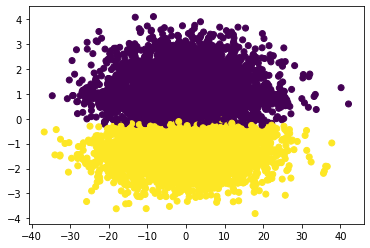

In [4]:
pca = PCA(n_components=2)
X = pca.fit_transform(data)

plt.scatter(x=X[:,0], y=X[:,1], c=pred)

## Test the model
Test the model with input_test.csv file.  
Preprocess with the same MinMaxScaler class and run the trained model with test data.

In [5]:
data_test = pd.read_csv("input_test.csv", header=None)
data_test_ = mms.transform(data_test)
pred = model.predict(data_test_)

## Save Output Data
save output_test.csv file

In [6]:
dataframe = pd.DataFrame(pred)
dataframe.to_csv("output_test.csv", header=False, index=False)